In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'E:/Users/Nathan/311_Service_Requests_from_2010_to_Present_min.csv')
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


## Can a predictive model be built for future prediction?

Let's calculate the total amount of complaints for each complaint type

In [5]:
df["Complaint Type"].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Electric                        1
Mold          

In [6]:
#Let's rename HEATING to HEAT/HOT WATER since the name of the value changed after 2014 as we said before
df["Complaint Type"] = np.where(df["Complaint Type"]=='HEATING','HEAT/HOT WATER',df["Complaint Type"])

Let's calculate the total amount of complaints for each complaint type again

In [7]:
df["Complaint Type"].value_counts()

HEAT/HOT WATER            2149424
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric                        1
Name: Complain

In [8]:
df["Complaint Type"] = np.where(df["Complaint Type"]=='HEATING','HEAT/HOT WATER',df["Complaint Type"])

In [5]:
df["Complaint Type"].value_counts().head()

HEAT/HOT WATER          1261574
HEATING                  887850
PLUMBING                 711130
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     451643
Name: Complaint Type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Unique Key              int64  
 2   Created Date            object 
 3   Closed Date             object 
 4   Complaint Type          object 
 5   Location Type           object 
 6   Incident Zip            float64
 7   Incident Address        object 
 8   Street Name             object 
 9   Address Type            object 
 10  City                    object 
 11  Status                  object 
 12  Resolution Description  object 
 13  Borough                 object 
 14  Latitude                float64
 15  Longitude               float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


Let's keep the complaint type that we are going to analyze

In [8]:
df = df[df['Complaint Type'] == "HEAT/HOT WATER"]

In [10]:
df["Complaint Type"].value_counts()

HEAT/HOT WATER    1261574
Name: Complaint Type, dtype: int64

In [11]:
df["Created Date"].head()

0    02/02/2020 06:09:17 AM
2    02/02/2020 02:27:41 AM
3    02/02/2020 12:13:18 PM
5    02/02/2020 07:52:08 AM
7    02/02/2020 09:00:54 AM
Name: Created Date, dtype: object

In [12]:
#IMPORTANT! Convert into datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [13]:
df["Created Date"].head()

0   2020-02-02 06:09:17
2   2020-02-02 02:27:41
3   2020-02-02 12:13:18
5   2020-02-02 07:52:08
7   2020-02-02 09:00:54
Name: Created Date, dtype: datetime64[ns]

In [14]:
#We know that BRONX has the most HEAT/HOT WATER problems
df = df[df.Borough == "BRONX"]

In [15]:
#Now let's make a graph
import datetime as dt
grp = df.groupby(df['Created Date'].dt.year) #if we don't convert the values to datetime this command is not going to work

In [16]:
grp.count()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
Created Date,,,,,,,,,,,,,,,,
2014,44918,44918,44918,44901,44918,44918,44918,44918,44918,44918,44918,44918,44918,44918,44918,44918
2015,71862,71862,71862,71800,71862,71862,71861,71862,71862,71862,71861,71862,71861,71862,71861,71861
2016,74201,74201,74201,74106,74201,74201,74197,74201,74201,74201,74197,74201,74201,74201,74197,74197
2017,68718,68718,68718,68548,68718,68718,68713,68718,68718,68718,68713,68718,68717,68718,68713,68713
2018,71454,71454,71454,71368,71454,71454,69616,71454,71454,69624,69616,71454,71453,71454,69616,69616
2019,70328,70328,70328,70257,70328,70328,70295,70328,70328,70322,70295,70328,70323,70328,70295,70295
2020,9372,9372,9372,8971,9372,9372,9370,9372,9372,9372,9370,9372,9366,9372,9370,9370


In [17]:
grp.count().index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Created Date')

In [18]:
#let's see in a graph
import matplotlib.pyplot as plt

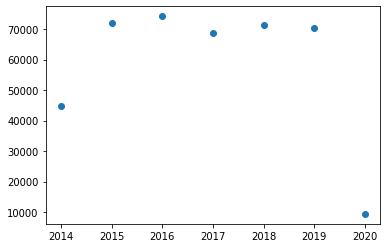

In [20]:
plt.scatter(grp.count().index ,grp.count()['Complaint Type'])
plt.show()

We are going to ignore 2010 and 2020 because the data are not complete for the whole year

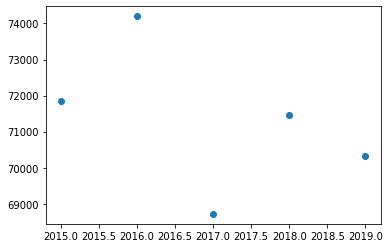

In [21]:
plt.scatter(grp.count().index[1:-1] ,grp.count()['Complaint Type'][1:-1])
plt.show()

Now we are going to build a linear regression model for predicting the future amount of complaints

In [22]:
#Let's define X and Y
X = grp.count().index[1:-1]
y = grp.count()['Complaint Type'][1:-1]

In [23]:
X = [X.tolist()]
X

[[2015, 2016, 2017, 2018, 2019]]

In [24]:
X = np.asarray(X)

In [25]:
X = X.reshape(-1, 1)

In [26]:
from sklearn.linear_model import LinearRegression 
lre = LinearRegression()

In [47]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
 
lre.fit(X_poly, y)

LinearRegression()

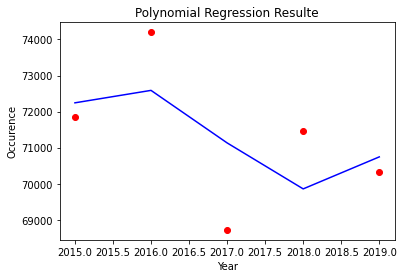

In [40]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'red') 
  
plt.plot(X, lre.predict(X_poly), color = 'blue') 
plt.title('Polynomial Regression Resulte') 
plt.xlabel('Year') 
plt.ylabel('Occurence') 
  
plt.show()

In [45]:
#let's predict the 2019 value
lre.predict(poly.fit_transform([[2020]]))

array([75777.58300781])

We are going to have to wait for the end of the year to see if the prediction is accurate

## Conclusion

In this notebook I used a linear regression model for predicting the future amount of complaints using Polynomial Features. I am pretty happy with the results because it's accurate. So the answer is YES a predictive model can be built to predict the future number of occurences